# Simulations

In this section, we will work with simulated data in order to explore some properties of the data. 

In [1]:
# Specparam imports
from fooof import FOOOF

# Neurodsp imports
from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal
from neurodsp.plts import plot_time_series

## Simulate Power Spectra

Words, words, words.

In [2]:
from fooof.sim import gen_power_spectrum, gen_group_power_spectra
from fooof.plts import plot_spectrum

In [3]:
freqs, powers = gen_power_spectrum([1, 40], [1, 1], [10, 0.5, 0.5])

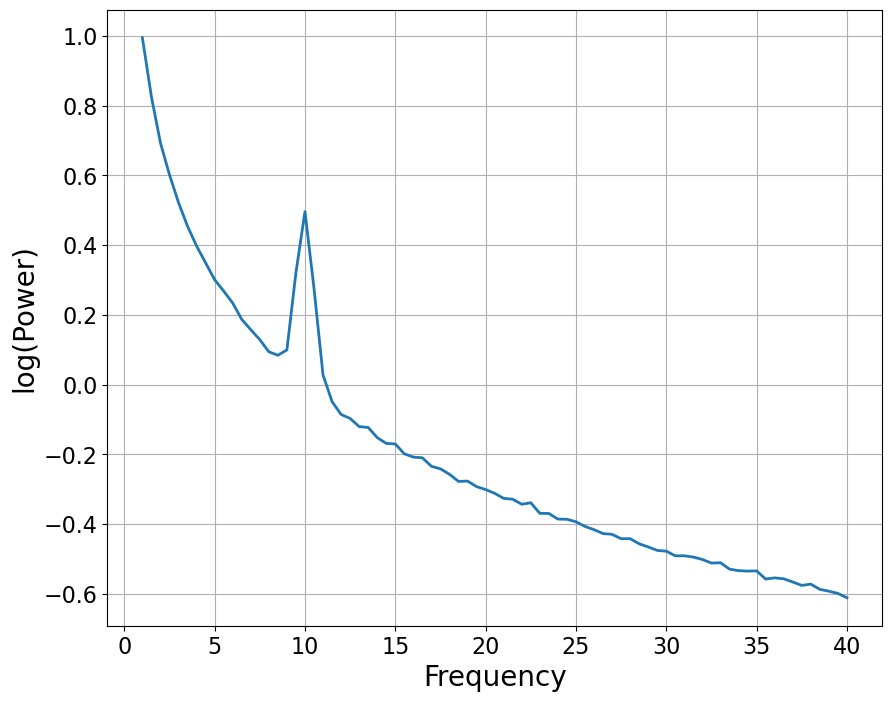

In [4]:
plot_spectrum(freqs, powers, log_powers=True)

## Simulate Time Series

- simulate power spectra: follow the examples from specparam

In [5]:
from neurodsp.sim.periodic import sim_oscillation, sim_bursty_oscillation
from neurodsp.sim.aperiodic import sim_powerlaw, sim_synaptic_current
from neurodsp.sim.combined import sim_combined

In [6]:
# Define simulation settings
n_seconds = 10
fs = 1000

#### Simulate an oscillation

In [7]:
osc = sim_oscillation(n_seconds, fs, freq=10)

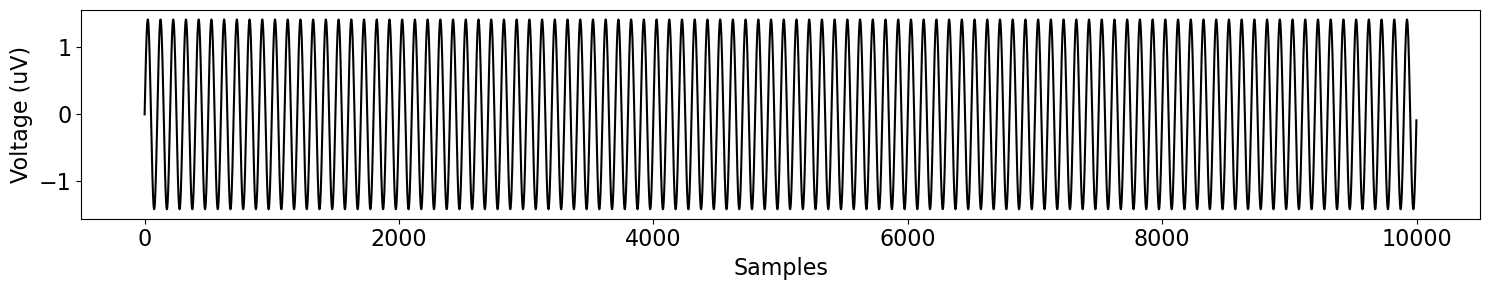

In [8]:
plot_time_series(None, osc)

#### Simulate an aperiodic signal

In [9]:
pink = sim_powerlaw(n_seconds, fs, -1)

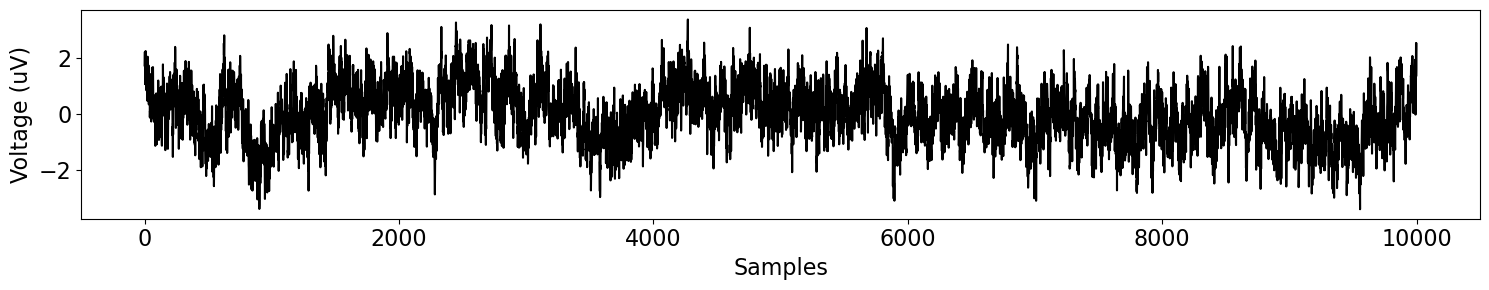

In [10]:
plot_time_series(None, pink)

#### Simulate a combined signal

In [11]:
components = {
    'sim_oscillation' : {'freq' : 10},
    'sim_powerlaw' : {'exponent' : -1},
}

In [12]:
sig = sim_combined(n_seconds, fs, components)

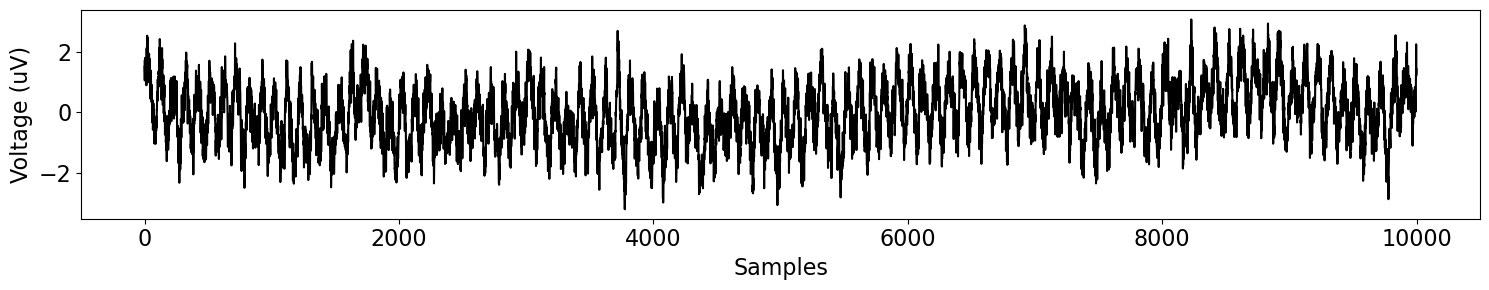

In [13]:
plot_time_series(None, sig)

### Fitting Spectral Models to Simulated Signals

In [14]:
freqs, powers = compute_spectrum(sig, fs)

In [15]:
fm = FOOOF()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 40 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                            Aperiodic Parameters (offs

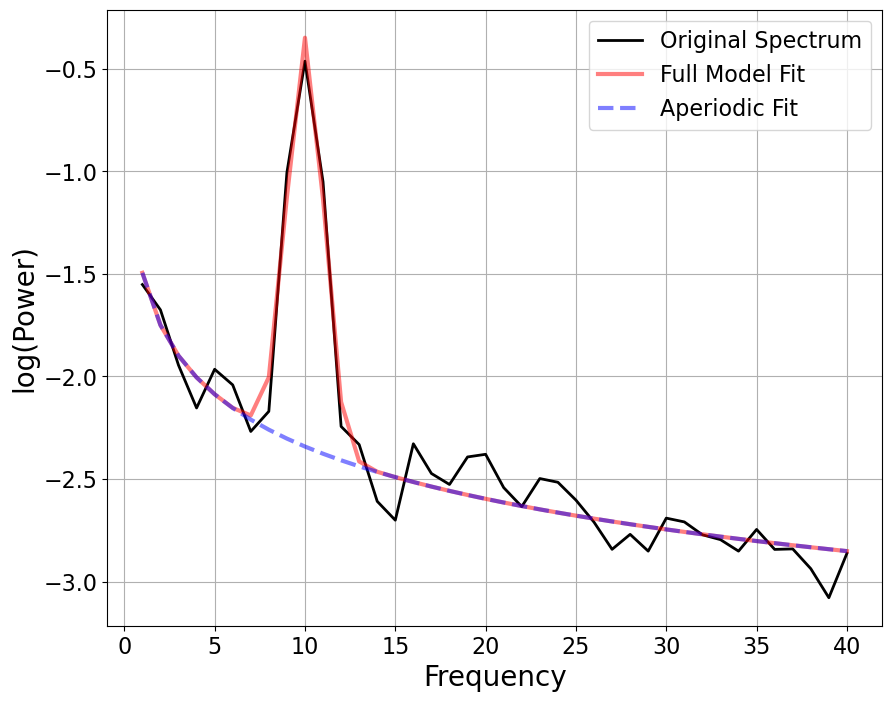

In [16]:
fm.report(freqs, powers, [1, 40])

## Exploring Measures on Simulated Signals

### Filtering Aperiodic Activity

- Simulate a aperiodic signal (eg. pink noise)
- Filter the simulated signal to a narrowband range (eg. the alpha range)

What does it look like? What does this show?

In [17]:
pink = sim_powerlaw(n_seconds, fs, -1)

In [18]:
filtered_pink = filter_signal(pink, fs, 'bandpass', [8, 12])

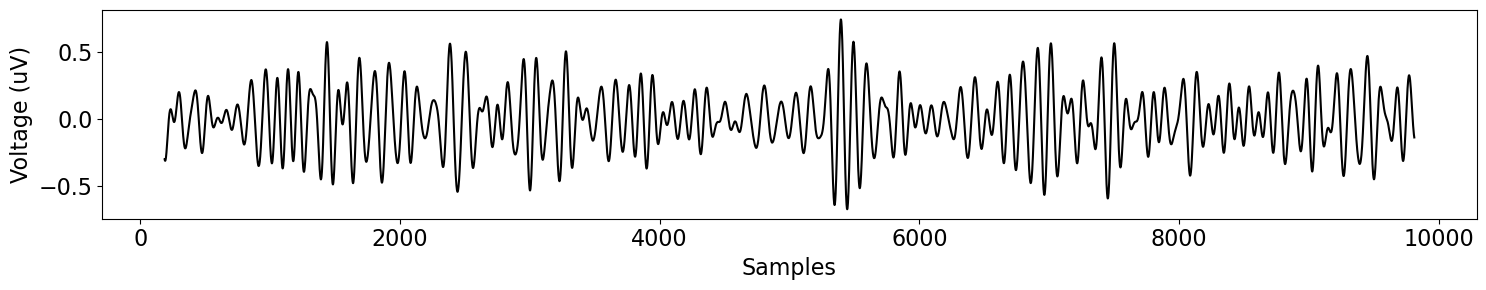

In [19]:
plot_time_series(None, filtered_pink)

### Filtering Asymmetric Waveforms

- Simulate a periodic signal with asymmetric waveforms (eg. sawtooth waves)
- Filter the simulated signal to a narrowband range (eg. the alpha range)

What does it look like? What does this show?

In [20]:
sawtooths = sim_oscillation(n_seconds, fs, 10, 'sawtooth', width=0.5)

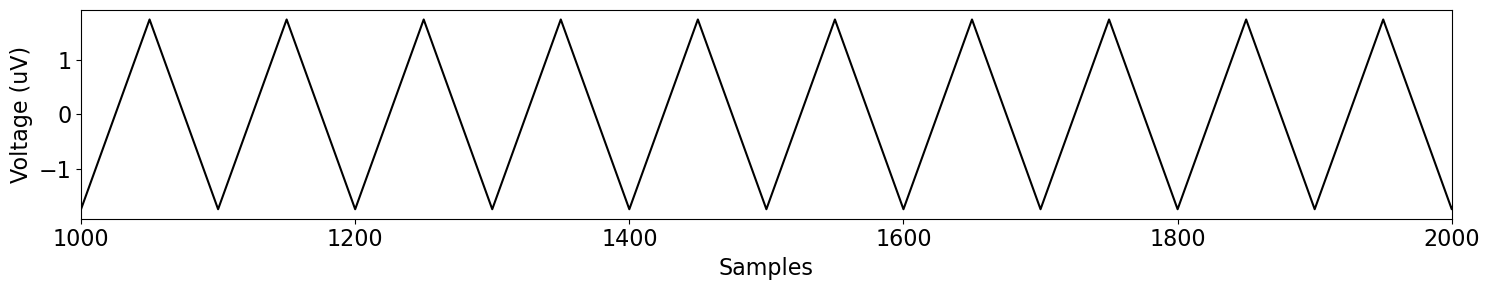

In [21]:
plot_time_series(None, sawtooths, xlim=[1000, 2000])

In [22]:
filtered_sawtooths = filter_signal(sawtooths, fs, 'bandpass', [8, 12])

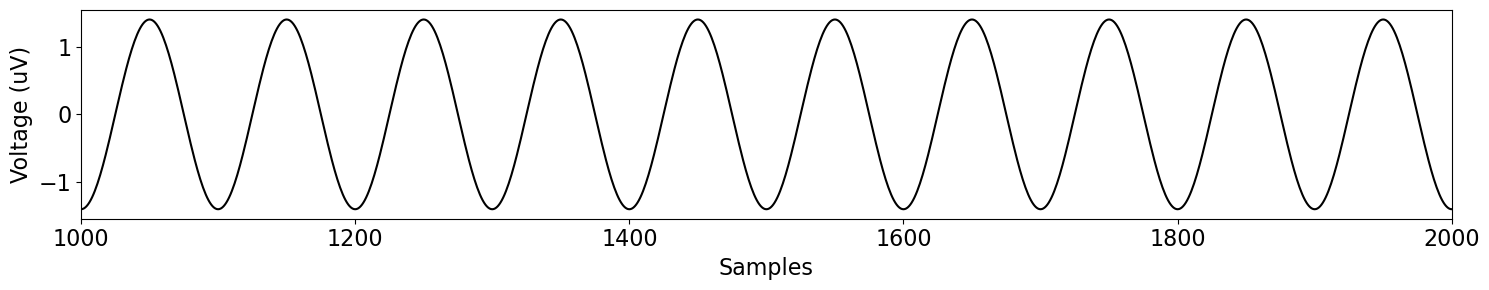

In [23]:
plot_time_series(None, filtered_sawtooths, xlim=[1000, 2000])